# Building models - part 2

1. [SVM model - linear classification](#section1)
2. [Decision trees - non linear classfication](#section2)

    2.1 [Overfitting - prune max depth](#section2.1)    
    2.2 [Overfitting - prune max depth for another dataset](#section2.2)    
    2.3 [Overfitting - use random forest](#section2.3)    

3. [Feature Importance](#section3) 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

<div>
<img src="images/03-Machine-Learning-Learning-Curve.jfif" width="500"/>
</div>

<a id='section1'></a>
# 1. SVM model - linear classification

Load the data

In [2]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/iris.csv'
iris_df = pd.read_csv(url)


Prepare the data - split the data to training data and test data:

In [3]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris_df[features]
y = iris_df['class']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=1) 

Define, fit, predict, evaluate

In [4]:
#from sklearn.svm import SVC
svm_model = SVC(random_state = 0)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
sk.metrics.accuracy_score(svm_pred, y_test)

0.9777777777777777

<a id='section2'></a>
# 2. Decision trees - nonlinear classification

The whole model

In [5]:
#from sklearn import tree
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
acc = sk.metrics.accuracy_score(pred, y_test)
acc

0.9555555555555556

<a id='section2.1'></a>

## 2.1. Overfitting - prune max depth

Check the accuracy with different limits 

Organize the data - split to train and test

Define a function that builds a model according to a given tree depth, and returns it's accuracy

In [6]:
def get_acc(max_depth, train_X, test_X, train_y, test_y):
    model = sk.tree.DecisionTreeClassifier(criterion="gini", max_depth=max_depth, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(test_X)
    acc = sk.metrics.accuracy_score(preds_val, test_y)
    return(acc)

examine differen number of depths:

In [7]:
for max_depth in [1, 2, 3, 4, 5]:
    my_acc = get_acc(max_depth, X_train, X_test, y_train, y_test)
    print(max_depth, my_acc)

1 0.6
2 0.9555555555555556
3 0.9555555555555556
4 0.9555555555555556
5 0.9555555555555556


<a id='section2.2'></a>

## 2.2. Overfitting - prune max depth for another dataset

Load the digits dataset. The format is a dictionary.

In [8]:
from sklearn.datasets import load_digits
digit_data = load_digits()

In [9]:
type(digit_data)

sklearn.utils.Bunch

In [10]:
digit_data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Prepare and split:

(We actually also need a validation data set, more on this if and when you take a ML course)

In [11]:
X = pd.DataFrame(digit_data.data, columns=digit_data.feature_names)
y = pd.Series(digit_data.target)
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=1) 
X.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


Use the function of max depth:

In [12]:
for max_depth in [1, 2, 3, 4, 5, 6 , 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25]:
    my_acc = get_acc(max_depth, X_train, X_test, y_train, y_test)
    print(max_depth, my_acc)

1 0.1925925925925926
2 0.3148148148148148
3 0.45925925925925926
4 0.575925925925926
5 0.6888888888888889
6 0.7814814814814814
7 0.8333333333333334
8 0.8518518518518519
9 0.8574074074074074
10 0.8555555555555555
11 0.8555555555555555
12 0.8574074074074074
13 0.8611111111111112
14 0.8611111111111112
15 0.8592592592592593
20 0.8592592592592593
25 0.8592592592592593


<a id='section2.3'></a>
## 2.3 Overfitting - use random forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=9, random_state=0, criterion="gini")
rf.fit(X_train, y_train)
predrf = rf.predict(X_test)
acc = sk.metrics.accuracy_score(predrf, y_test)
acc

0.9722222222222222

<a id='section3'></a>
# 3. Feature importance

#### 3.1 Petal vs Sepal

Which attributes were the most important in the training data?

In [14]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris_df[features]
y = iris_df['class']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=1) 

In [15]:
dt = sk.tree.DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
acc = sk.metrics.accuracy_score(pred, y_test)

In [16]:
dt.feature_importances_

array([0.02146947, 0.02146947, 0.06316954, 0.89389153])

organize it in a nicer format:

In [17]:
feature_importances = pd.DataFrame(dt.feature_importances_,
                                   index = iris_df.columns[:4],
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
petal_width,0.893892
petal_length,0.063170
sepal_length,0.021469
sepal_width,0.021469


We see that petal is most important. What happens if we only use sepal?

In [18]:
X_s = iris_df[['sepal_length','sepal_width']]
y_s = iris_df['class']
X_train_s, X_test_s, y_train_s, y_test_s = sk.model_selection.train_test_split(X_s, y_s, test_size=0.3, random_state=1) 
model_s = sk.tree.DecisionTreeClassifier(criterion="gini")
model_s.fit(X_train_s, y_train_s)
prediction_s = model_s.predict(X_test_s)
print('The accuracy of the Decision Tree is',sk.metrics.accuracy_score(prediction_s,y_test_s)) 

The accuracy of the Decision Tree is 0.6444444444444445


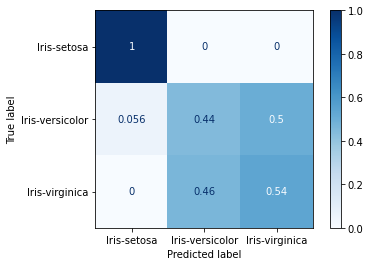

In [19]:
prediction_s = model_s.predict(X_test_s)
cm = confusion_matrix(y_test_s, prediction_s, labels=model_s.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_s.classes_)
disp.plot(cmap=plt.cm.Blues)

In [20]:
df2 = pd.DataFrame(columns = ['class', 'predictions'])
df2['class'] = y_test_s
df2 = df2.reset_index(drop=True)
df2['predictions'] = pd.Series(prediction_s) 

Now let's try a model with two features: one sepal and one petal:

In [21]:
#X_s = iris_df[['sepal_length','sepal_width']]
X_m = iris_df[['sepal_length','petal_width']]
y_m = iris_df['class']
X_train_m, X_test_m, y_train_m, y_test_m = sk.model_selection.train_test_split(X_m, y_m, test_size=0.3, random_state=1) 
model_mix = sk.tree.DecisionTreeClassifier(criterion="gini", random_state=1)
model_mix.fit(X_train_m,y_train_m)
prediction_mix = model_mix.predict(X_test_m)
print('The accuracy of the Decision Tree is',sk.metrics.accuracy_score(prediction_mix, y_test_m))

The accuracy of the Decision Tree is 0.9555555555555556


#### 3.2 an SVM model

In [22]:
from sklearn.svm import SVC
svm_model = SVC(random_state = 0)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
sk.metrics.accuracy_score(svm_pred, y_test)

0.9777777777777777

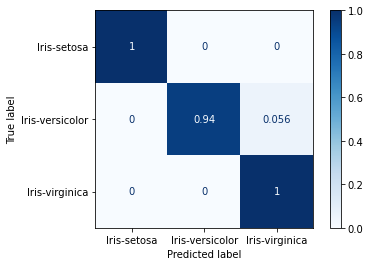

In [23]:
prediction_svm = svm_model.predict(X_test)
cm = confusion_matrix(y_test, prediction_svm, labels=svm_model.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap=plt.cm.Blues)

-----